In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data'
img_path = 'img'
if not os.path.exists('img'):
    os.mkdir('img')
log_path = f'{data_path}/logs'

## get the number of request

In [3]:
all_date = ['0727', '0728', '0729', '0730', '0803', '0804', '0806']
request_path = [f'{log_path}/{date}/log/healthcheck.csv' for date in all_date]
request_df = [pd.read_csv(file)[['s_uuid', 'retry', 'status']] for file in request_path]

# the number of request
request_num = [len(df.drop_duplicates(subset='s_uuid')) for df in request_df]

# the number of receive request unsuccess
unhealthcheck_num = [[len(group) >= 3 for _, group in df.groupby('s_uuid')].count(True) 
                      for df in request_df]

inference_path = [f'{log_path}/{date}/log/inference.csv' for date in all_date]
inference_df = [pd.read_csv(file)[['s_uuid', 'retry', 'status']] for file in inference_path]

# the number of inference success
inference_num = [[len(group) < 3 for _, group in df.groupby('s_uuid')].count(True) 
                  for df in inference_df]
uninference_num = [[len(group) >= 3 for _, group in df.groupby('s_uuid')].count(True) 
                 for df in inference_df]

## get the score

In [4]:
all_date = ['07-27', '07-28', '07-29', '07-30', '08-03', '08-04', '08-06']
leaderboard_path = [f'{log_path}/leaderboard/all-leaderboard-2020-{date}.csv'
                    for date in all_date]
leaderboard_df = [pd.read_csv(file, index_col='隊伍名稱') for file in leaderboard_path]

# get the team score
all_team = leaderboard_df[0].index.tolist()
team_score = {team: [0]*len(all_date) for team in all_team}

for i in range(0, len(all_date)):
    if i == 0:
        for team in all_team:
            team_score[team][0] = leaderboard_df[0].loc[team]['目前總分']
    else:
        for team in all_team:
            team_score[team][i] = leaderboard_df[i].loc[team]['目前總分']- \
                                  leaderboard_df[i-1].loc[team]['目前總分']

## draw the score

In [5]:
# get top9 and ours score
final_df = pd.read_csv(f'{log_path}/leaderboard/all-leaderboard-2020-08-06.csv')
top10_df = final_df[(final_df['名次'] <= 9) | (final_df['隊伍名稱'] == 'IKM一定鳥 ')]

top10_team = top10_df['隊伍名稱'].tolist()
top10_score = [team_score[team] for team in top10_team]

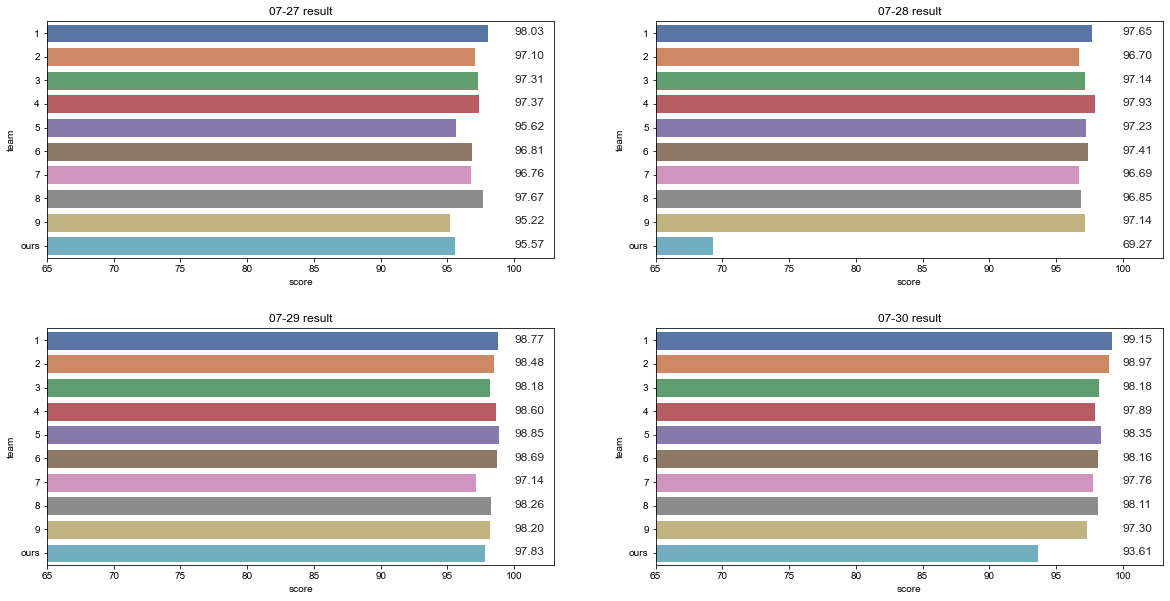

In [6]:
# plot first week score
fig, axis = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)
sns.set(style="darkgrid")
date = ['07-27', '07-28', '07-29', '07-30']

for i in range(4):
    score_df = pd.DataFrame({'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'ours'],
                             'score': [score[i]/375*100 for score in top10_score]})
    axis[i//2, i%2].set(xlim=[65, 103])
    axis[i//2, i%2].set_title(f'{date[i]} result')
    ax = sns.barplot(x="score", y="team", data=score_df, ax=axis[i//2, i%2], ci=None)
    
    for index, row in score_df.iterrows():
        ax.text(100, index+0.1, "{0:.2f}".format(row.score))
        
plt.savefig(f'{img_path}/week1_result')

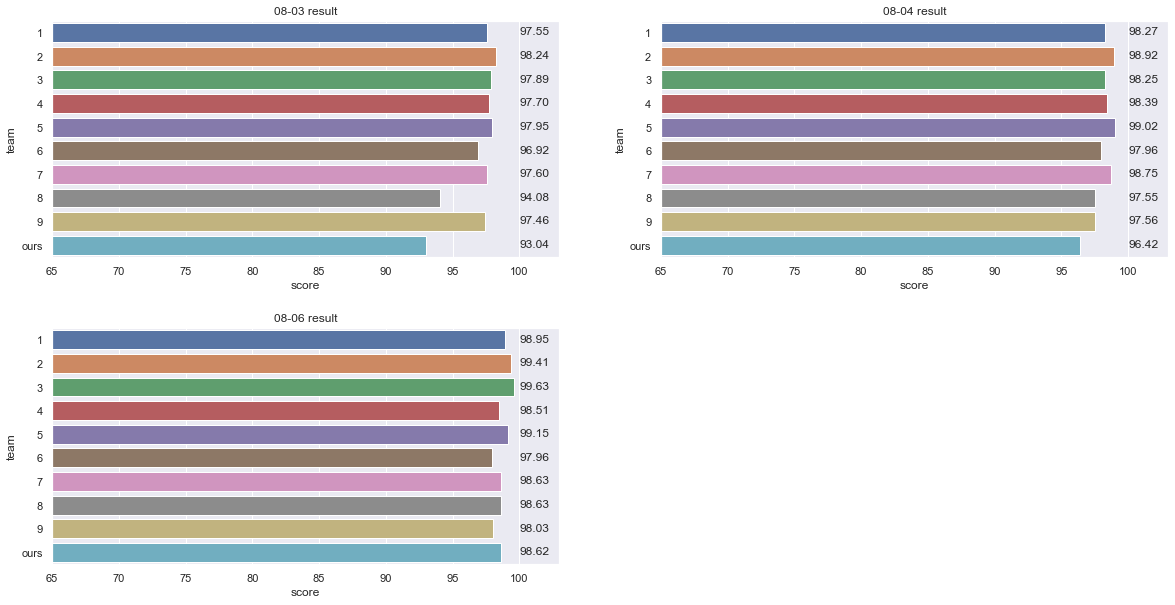

In [7]:
# plot first week score
fig, axis = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)
sns.set(style="darkgrid")
date = ['08-03', '08-04', '08-06']

for i in range(3):
    score_df = pd.DataFrame({'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'ours'],
                             'score': [score[i+4]/375*100 for score in top10_score]})
    axis[i//2, i%2].set(xlim=[65, 103])
    axis[i//2, i%2].set_title(f'{date[i]} result')
    ax = sns.barplot(x="score", y="team", data=score_df, ax=axis[i//2, i%2], ci=None)
    
    for index, row in score_df.iterrows():
        ax.text(100, index+0.1, "{0:.2f}".format(row.score))
        
axis[1, 1].axis('off')
plt.savefig(f'{img_path}/week2_result')